# Dataset Exploration of BTS Flight Data
## by Christine Howard

## Preliminary Wrangling

> I will be working with the Flights dataset, which looks at millions of flights over nearly 2 decades to see what factors may contribute to flight delays. I have chosen to look mainly at the flight data from 2005, while making a comparison of delays between 1990 and 2005. The files are extremely large, so comparing multiple years would make this analysis very slow and difficult. I will focus my analysis on looking to see what contributing factors there are on both arrival and departure flight delays.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> First, I will load in my datasets and take a look at their properties.

In [2]:
df_airports = pd.read_csv('airports.csv')
df_carriers = pd.read_csv('carriers.csv') 
df_1990 = pd.read_csv('1990.csv')
df_2005 = pd.read_csv('2005.csv')

There are 4 datasets within this single dataset: 1 with airport information, 1 with carrier information, and 2 with 1990 and 2005 flight data. I will start by taking a look at the shape/head of the 2 flight datasets.<br><br>I have not yet determined if I will be using the airports or carriers datasets, so I will not explore them at this stage.

In [3]:
df_1990.shape

(5270893, 29)

In [4]:
df_2005.shape

(7140596, 29)

These datasets are huge! Both have several million rows, no wonder downloading them was a slow process!

In [5]:
df_1990.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1990,1,3,3,1707.0,1630,1755.0,1723,US,29,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1990,1,4,4,1706.0,1630,1807.0,1723,US,29,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1990,1,5,5,1629.0,1630,1715.0,1723,US,29,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1990,1,6,6,1633.0,1630,1718.0,1723,US,29,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1990,1,8,1,1630.0,1630,1726.0,1723,US,29,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [6]:
df_2005.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,4,23,0,NaN,0,0,0,0,0,0
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,6,15,0,NaN,0,0,0,0,0,0
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,9,18,0,NaN,0,0,0,0,0,0
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,11,10,0,NaN,0,0,0,0,0,0
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,5,10,0,NaN,0,0,0,0,0,0


df_2005 and df_2990 each have millions of rows, and a lot of columns (29). I want to try to remove some unnecessary information to make these datasets smaller, such as any duplicates or columns I will likely not be using for my analysis.

In [7]:
df_1990.duplicated().sum()

0

In [8]:
df_2005.duplicated().sum()

11

Surprisingly, there are a minimal number of duplicates considering the massive size of the dfs. I will delete these 1 duplicates shortly.

Before making any changes to the dfs, I want to make copies of each so I can refer back to these if needed.

In [9]:
df_1990_clean = df_1990.copy()
df_2005_clean = df_2005.copy()

In [10]:
df_2005_clean.drop_duplicates(inplace=True) # dropping duplicates

In [11]:
df_2005_clean.shape # looks like that worked

(7140585, 29)

Next I will look at the columns to see which I want to drop, in order to make the dataset smaller. As it stands now, when I look at the head I can only see a portion of the columns.

In [12]:
df_1990_clean.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [13]:
df_2005_clean.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

It looks like all columns match in both datasets, which is great. I will refer to this link which has more information about each column to find out more information about what each means: https://www.transtats.bts.gov/Fields.asp?Table_ID=236

I do not think I will be needing the following rows: FlightNum and TailNum. I am not sure about cancelled: I want to see how many rows had flights that were cancelled then decide to drop this column or not. But it does not seem to make sense to look at reasons for flight delays for any flights that were cancelled, as they would not have actually taken off, so I will likely drop any rows that were cancelled flights and then drop these 2 cancellation columns.

In [14]:
df_1990_clean.Cancelled.value_counts()

0    5218435
1      52458
Name: Cancelled, dtype: int64

In [15]:
df_2005_clean.Cancelled.value_counts()

0    7006855
1     133730
Name: Cancelled, dtype: int64

There are a significant number of flights in the datasets that were cancelled. I am interested to have a quick look to see why they were cancelled.

In [16]:
df_1990_clean.CancellationCode.value_counts()
# there are no cancellation codes in the 1990 dataset

Series([], Name: CancellationCode, dtype: int64)

In [17]:
df_2005_clean.CancellationCode.value_counts()

A    59350
B    51205
C    23084
D       92
Name: CancellationCode, dtype: int64

I will need to load another csv file that I did not load at the start in order to find out what these codes mean.

In [18]:
df_var_descript = pd.read_csv('variable-descriptions.csv')

In [19]:
df_var_descript

,Variable descriptions,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Name,Description
2,1.0,Year,1987-2008
3,2.0,Month,12-Jan
4,3.0,DayofMonth,31-Jan
5,4.0,DayOfWeek,1 (Monday) - 7 (Sunday)
6,5.0,DepTime,"actual departure time (local, hhmm)"
7,6.0,CRSDepTime,"scheduled departure time (local, hhmm)"
8,7.0,ArrTime,"actual arrival time (local, hhmm)"
9,8.0,CRSArrTime,"scheduled arrival time (local, hhmm)"


I need to expand column width in order to read all the cancellation reasons.

In [20]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-20-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [21]:
df_var_descript

,Variable descriptions,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Name,Description
2,1.0,Year,1987-2008
3,2.0,Month,12-Jan
4,3.0,DayofMonth,31-Jan
5,4.0,DayOfWeek,1 (Monday) - 7 (Sunday)
6,5.0,DepTime,"actual departure time (local, hhmm)"
7,6.0,CRSDepTime,"scheduled departure time (local, hhmm)"
8,7.0,ArrTime,"actual arrival time (local, hhmm)"
9,8.0,CRSArrTime,"scheduled arrival time (local, hhmm)"


Now we can see the reasons for cancellation. This is certainly interesting information, and could definitely be useful if I wanted to look at different factors related to why flights are cancelled, but in my analysis I will just be focusing on factors related to delayed flights, that were not cancelled, but that actually flew.<br><br>First, I will delete rows where Cancelled = 1, meaning the flights were cancelled.<br><br>Then I will delete these cancellation columns, as well as flight number and tail number.

In [22]:
# drop rows where values in Cancelled column are 1, meaning flights were canceled.
df_1990_clean.drop(df_1990_clean[df_1990_clean.Cancelled == 1].index, inplace=True)

In [23]:
df_2005_clean.drop(df_2005_clean[df_2005_clean.Cancelled == 1].index, inplace=True)

In [24]:
df_1990_clean.Cancelled.value_counts() # checking this worked

0    5218435
Name: Cancelled, dtype: int64

In [25]:
df_2005_clean.Cancelled.value_counts()

0    7006855
Name: Cancelled, dtype: int64

Great, now I only have flights that were not cancelled left in the dfs. I will now drop the 4 columns I mentioned.

In [26]:
columns_to_drop = ['FlightNum', 'TailNum', 'Cancelled', 'CancellationCode']
df_1990_clean = df_1990_clean.drop(columns_to_drop, axis=1)

In [27]:
columns_to_drop = ['FlightNum', 'TailNum', 'Cancelled', 'CancellationCode']
df_2005_clean = df_2005_clean.drop(columns_to_drop, axis=1)

In [28]:
df_1990_clean.shape # checking this worked

(5218435, 25)

In [29]:
df_2005_clean.shape

(7006855, 25)

Now, I want to have a look at where we have null values in the dfs.

In [30]:
df_1990_clean.isna().sum()

Year                 0      
Month                0      
DayofMonth           0      
DayOfWeek            0      
DepTime              0      
CRSDepTime           0      
ArrTime              15954  
CRSArrTime           0      
UniqueCarrier        0      
ActualElapsedTime    15954  
CRSElapsedTime       0      
AirTime              5218435
ArrDelay             15954  
DepDelay             0      
Origin               0      
Dest                 0      
Distance             92293  
TaxiIn               5218435
TaxiOut              5218435
Diverted             0      
CarrierDelay         5218435
WeatherDelay         5218435
NASDelay             5218435
SecurityDelay        5218435
LateAircraftDelay    5218435
dtype: int64

In [31]:
df_2005_clean.isna().sum()

Year                 0    
Month                0    
DayofMonth           0    
DayOfWeek            0    
DepTime              0    
CRSDepTime           0    
ArrTime              14028
CRSArrTime           0    
UniqueCarrier        0    
ActualElapsedTime    14028
CRSElapsedTime       0    
AirTime              14028
ArrDelay             14028
DepDelay             0    
Origin               0    
Dest                 0    
Distance             0    
TaxiIn               0    
TaxiOut              0    
Diverted             0    
CarrierDelay         0    
WeatherDelay         0    
NASDelay             0    
SecurityDelay        0    
LateAircraftDelay    0    
dtype: int64

There are a lot of null values in the 1990 dataset, so we will not be able to compare all variables between the 2 years. I may compare between the 2 years in regards to certain variables, but will work more closely with the 2005 dataset as it is more complete.

In [32]:
df_2005_clean[['ArrDelay', 'DepDelay']].head() 
# in the head we see that there are negative values in both columns for at least some rows

,ArrDelay,DepDelay
0,-18.0,-2.0
1,-23.0,-6.0
2,-24.0,-7.0
3,-33.0,-9.0
4,3.0,34.0


In reviewing the link above, I found that negative values in the delays columns mean that these flights actually departed/arrived early, and a 0 in these columns would mean that the flights arrived/departed on time.

In this analysis, I am only interested in looking at delayed flights, as I will compare factors to see which have an impact on either arrival and/or departure delays. This means that I am not interested in any flights that were not delayed (as I was uninterested in flights that were cancelled).<br><br>I therefore want to delete any rows in which values in both columns (ArrDelay and DepDelay) are <= 0, and create a new df with only rows in which the flights were delayed.

In [33]:
# I found an intersection function I will use to delete columns in which both the departures/arrivals columns had values <= 0
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

arrival_notdelayed = df_2005_clean[df_2005_clean.ArrDelay <= 0].index
# find the index of all of the rows in ArrDelay column that are <= 0
departure_notdelayed = df_2005_clean[df_2005_clean.DepDelay <= 0].index
# find the index of all of the rows in DepDelay column that are <= 0

df_2005_clean_delayed = df_2005_clean.drop(intersection(arrival_notdelayed, departure_notdelayed))
# I match the ones that have in both the ArrDelay and DepDelay columns values <= 0.
# this means that these flights departed and arrived either early, or on time, and neither the arrival nor departure were delayed.

In [34]:
df_2005_clean_delayed[['ArrDelay', 'DepDelay']].reset_index(drop=True)
# the first 4 rows in the df_2005_clean had negative values in both columns originally
# I can check the new head for these columns to see if there are still negative values
# I also want to reset index so that I do not hold on to the old row indexes

,ArrDelay,DepDelay
0,3.0,34.0
1,97.0,102.0
2,85.0,106.0
3,105.0,130.0
4,12.0,-1.0
...,...,...
3601825,3.0,0.0
3601826,10.0,8.0
3601827,6.0,-1.0
3601828,10.0,0.0


It looks like this worked! There are still negative values, but it looks like only in 1 of 2 and not both rows. I dropped nearly half the number of rows in the df, and now the dataset should be a bit more manageable to work with.

I will repeat the exact same process for the 1990 dataset.

In [35]:
df_1990_clean[['ArrDelay', 'DepDelay']].head() 
# in the head we see that there are negative values in both columns for at least some rows

,ArrDelay,DepDelay
0,32.0,37.0
1,44.0,36.0
2,-8.0,-1.0
3,-5.0,3.0
4,3.0,0.0


In [36]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

arrival_notdelayed = df_1990_clean[df_1990_clean.ArrDelay <= 0].index
departure_notdelayed = df_1990_clean[df_1990_clean.DepDelay <= 0].index

df_1990_clean_delayed = df_1990_clean.drop(intersection(arrival_notdelayed, departure_notdelayed))

In [37]:
df_1990_clean_delayed[['ArrDelay', 'DepDelay']].reset_index(drop=True)

,ArrDelay,DepDelay
0,32.0,37.0
1,44.0,36.0
2,-5.0,3.0
3,3.0,0.0
4,55.0,64.0
...,...,...
3307375,17.0,23.0
3307376,13.0,22.0
3307377,32.0,39.0
3307378,-1.0,17.0


It seems there were fewer flights included in the 1990 dataset that were not delayed, and now there is only a difference of 294450 flights between the 2 dfs, instead of more than a million as before.

I also just want to quickly lowercase all column names and rename certain columns to make them a bit more descriptive, and easier to refer to later on.

In [38]:
df_1990_clean_delayed.rename(columns=lambda x: x.lower(), inplace=True) 
# I use a lambda function to make all column names lowercase, in place

In [39]:
df_1990_clean_delayed.columns # looks like this worked

Index(['year', 'month', 'dayofmonth', 'dayofweek', 'deptime', 'crsdeptime',
       'arrtime', 'crsarrtime', 'uniquecarrier', 'actualelapsedtime',
       'crselapsedtime', 'airtime', 'arrdelay', 'depdelay', 'origin', 'dest',
       'distance', 'taxiin', 'taxiout', 'diverted', 'carrierdelay',
       'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay'],
      dtype='object')

In [40]:
df_2005_clean_delayed.rename(columns=lambda x: x.lower(), inplace=True) # I'll repeat the process for the other df

In [41]:
# now I will rename the columns to make them more descriptive/easier to type and remember
df_1990_clean_delayed.rename(columns={'dayofmonth': 'day_of_month', 'dayofweek': 'day_of_week', 'deptime': 'departure_time',
                                     'crsdeptime': 'scheduled_dep_time', 'arrtime': 'arrival_time', 
                                     'crsarrtime': 'scheduled_arr_time', 'uniquecarrier': 'carrier', 
                                      'actualelapsedtime': 'actual_elapsed_time', 'crselapsedtime': 'scheduled_elapsed_time',
                                      'arrdelay': 'arrival_delay', 'depdelay': 'departure_delay', 'dest': 'destination',
                                      'taxiin': 'taxi_in', 'taxiout': 'taxi_out', 'carrierdelay': 'carrier_delay',
                                      'weatherdelay': 'weather_delay', 'nasdelay': 'nas_delay', 'securitydelay': 'security_delay',
                                      'lateaircraftdelay' : 'late_aircraft_delay'}, inplace=True)

In [42]:
df_1990_clean_delayed.columns # this worked

Index(['year', 'month', 'day_of_month', 'day_of_week', 'departure_time',
       'scheduled_dep_time', 'arrival_time', 'scheduled_arr_time', 'carrier',
       'actual_elapsed_time', 'scheduled_elapsed_time', 'airtime',
       'arrival_delay', 'departure_delay', 'origin', 'destination', 'distance',
       'taxi_in', 'taxi_out', 'diverted', 'carrier_delay', 'weather_delay',
       'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [43]:
# repeating this for the other df
df_2005_clean_delayed.rename(columns={'dayofmonth': 'day_of_month', 'dayofweek': 'day_of_week', 'deptime': 'departure_time',
                                     'crsdeptime': 'scheduled_dep_time', 'arrtime': 'arrival_time', 
                                     'crsarrtime': 'scheduled_arr_time', 'uniquecarrier': 'carrier', 
                                      'actualelapsedtime': 'actual_elapsed_time', 'crselapsedtime': 'scheduled_elapsed_time',
                                      'arrdelay': 'arrival_delay', 'depdelay': 'departure_delay', 'dest': 'destination',
                                      'taxiin': 'taxi_in', 'taxiout': 'taxi_out', 'carrierdelay': 'carrier_delay',
                                      'weatherdelay': 'weather_delay', 'nasdelay': 'nas_delay', 'securitydelay': 'security_delay',
                                      'lateaircraftdelay' : 'late_aircraft_delay'}, inplace=True)

In [44]:
df_2005_clean_delayed.head()

,year,month,day_of_month,day_of_week,departure_time,scheduled_dep_time,arrival_time,scheduled_arr_time,carrier,actual_elapsed_time,...,destination,distance,taxi_in,taxi_out,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,121.0,...,BOS,867,5,10,0,0,0,0,0,0
5,2005,1,3,1,2042.0,1900,9.0,2232,UA,147.0,...,BOS,867,3,47,0,23,0,0,0,74
6,2005,1,4,2,2046.0,1900,2357.0,2232,UA,131.0,...,BOS,867,5,26,0,46,0,0,0,39
8,2005,1,6,4,2110.0,1900,8.0,2223,UA,118.0,...,BOS,867,2,15,0,16,0,0,0,89
9,2005,1,7,5,1859.0,1900,2235.0,2223,UA,156.0,...,BOS,867,4,56,0,0,0,0,0,0


Great, these columns will now be easier to work with. I am happy with the cleanliness of my data and will more forward to exploration now. I may need to perform some additional cleaning tasks as I move forward.

### What is the structure of your dataset?<br><br>
After cleaning my data, each df has 3307380 (1990) and 3601830 (2005) rows respectively, and 25 columns.

In [45]:
df_1990_clean_delayed.shape

(3307380, 25)

In [46]:
df_2005_clean_delayed.shape

(3601830, 25)

The descriptions of the columns are as follows:<br><br>

1. year: year of data in df
2. month: month of data in df (1-12)
3. day_month: date of month (31 for the 31st of x month)
4. day_of_week: day of week (1-7, Monday-Sunday)
5. departure_time: actual time of departure (all times: local, hhmm)
6. scheduled_dep_time: scheduled time of departure
7. arrival_time: actual arrival time
8. scheduled_arr_time: scheduled arrival time
9. carrier: airline code
10. actual_elapsed_time: actual duration of flight (all in minutes)
11. scheduled_elapsed_time: scheduled flight duration
12. airtime: time in the air
13. arrival_delay: delay in arrival
14. departure_delay: delay in departure
15. origin: departure airport
16. destination: destination airport
17. distance: distance of flight (in miles)
18. taxi_in: taxi in time (minutes)
19. taxi_out: taxi out time
20. diverted: 0 if flight was not diverted, 1 if flight was diverted
21. carrier_delay: delay due to carrier (minutes)
22. weather_delay: delay due to weather
23. nas_delay: delay due to National Aviation System (NAS)
24. security_delay: delay due to security issue
25. late_aircraft_delay: delay due to late aircraft

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest in my dataset is flight delays. In this data analysis, I will explore what factors seemed to contribute towards delayed flights in 2005.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think that flights that were diverted will likely cause some long arrival delays, and I think that weather will be a big contributor towards departure delays as well. I imagine there could also be longer delays on days like a Friday, as many people would like to fly on this day, and also more delays in December and in the summer, than in the rest of the year, as that is another high traffic time for flights.

## Univariate Exploration

I first want to look at arrival and departure delays separately to see how they compare for the 2005 dataset.

In [47]:
df_2005_clean_delayed_arrival = df_2005_clean_delayed[df_2005_clean_delayed['arrival_delay'] > 0]
df_2005_clean_delayed_departure = df_2005_clean_delayed[df_2005_clean_delayed['departure_delay'] > 0]
# this will give me 2 new dfs: 1 with flights that had arrival delays, and 1 only with flights that had departure delays.
# many of flights will likely exist in both dfs.

df_2005_clean_delayed_arrival.reset_index(drop=True, inplace=True) # reset indexes for new dfs
df_2005_clean_delayed_departure.reset_index(drop=True, inplace=True)

,year,month,day_of_month,day_of_week,departure_time,scheduled_dep_time,arrival_time,scheduled_arr_time,carrier,actual_elapsed_time,...,destination,distance,taxi_in,taxi_out,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,121.0,...,BOS,867,5,10,0,0,0,0,0,0
5,2005,1,3,1,2042.0,1900,9.0,2232,UA,147.0,...,BOS,867,3,47,0,23,0,0,0,74
6,2005,1,4,2,2046.0,1900,2357.0,2232,UA,131.0,...,BOS,867,5,26,0,46,0,0,0,39
8,2005,1,6,4,2110.0,1900,8.0,2223,UA,118.0,...,BOS,867,2,15,0,16,0,0,0,89
9,2005,1,7,5,1859.0,1900,2235.0,2223,UA,156.0,...,BOS,867,4,56,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7140585,2005,12,22,4,1805.0,1805,1913.0,1910,DL,68.0,...,ATL,223,11,8,0,0,0,0,0,0
7140586,2005,12,22,4,2207.0,2159,2343.0,2333,DL,96.0,...,DAY,432,5,23,0,0,0,0,0,0
7140587,2005,12,22,4,758.0,759,1247.0,1241,DL,169.0,...,ATL,1199,6,14,0,0,0,0,0,0
7140592,2005,12,22,4,1825.0,1825,1858.0,1848,DL,93.0,...,MEM,332,7,32,0,0,0,0,0,0


First, I want to have a look at arrival and departure delays in histograms to see how values lie.

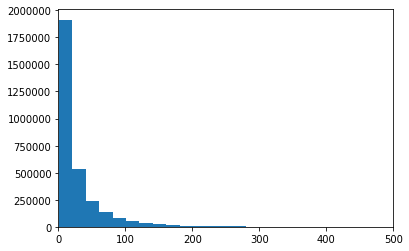

In [48]:
bins = np.arange(1, df_2005_clean_delayed_arrival['arrival_delay'].max()+0.5, 20) 
plt.hist(data = df_2005_clean_delayed_arrival, x = 'arrival_delay', bins = bins);
plt.xlim((0, 500));

With bins set to 20, and with the values trailing off to the right, it is hard to get a good picture of the data, but it is clear that the vast majority of values fall in the first bin, from 1-20 minutes.

In [49]:
df_2005_clean_delayed_arrival.arrival_delay.describe()

count    3.063215e+06
mean     2.832096e+01
std      4.254396e+01
min      1.000000e+00
25%      6.000000e+00
50%      1.400000e+01
75%      3.300000e+01
max      1.925000e+03
Name: arrival_delay, dtype: float64

I will now use information from arrival_delay.describe to set bins and set a logarithmic x-scale.

<ipython-input-50-99b4b8df3245>:8: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 1000); # i am restricting the xlim to 1000 to avoid an extremely long tail with very minimal values.


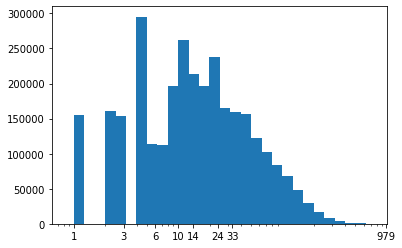

In [50]:
bins = 10 ** np.arange(np.log10(df_2005_clean_delayed_arrival.arrival_delay.min()), 
                       np.log10(df_2005_clean_delayed_arrival.arrival_delay.max())+1, 0.1)
# i set log10 of the min/max values for the max and min, and start with 0.2 for bin size
plt.hist(df_2005_clean_delayed_arrival.arrival_delay, bins = bins);
plt.xscale('log');
tick_locs = [1, 3, 6, 10, 14, 24, 33, 979, 1925]
plt.xticks(tick_locs, tick_locs);
plt.xlim(0, 1000); # i am restricting the xlim to 1000 to avoid an extremely long tail with very minimal values.

With smaller bins and the x-lim, I can much more clearly see where the values fall, and see that there are some gaps, meaning this number of delayed minutes is not present in the column. The graph is not as clearly right skewed as in the first histogram. It seems that the majority of arrival departures were between 4-5 minutes, the next were those around 12-13, and the next were around 22 or so. Delays of about 5-8 minutes are comparably rare, and after about 22 minutes delay, the number of delays drops steadily.<br><br>I could certainly repeat this process for the df_2005_clean_delayed_departure df, but after comparing the describe information, it does not look like there would be much of a change in another graph. The min is the same, and the other values differ only slightly, so I will not plot the other df.

In [51]:
df_2005_clean_delayed_departure.departure_delay.describe()

count    2.537852e+06
mean     2.970273e+01
std      4.392979e+01
min      1.000000e+00
25%      5.000000e+00
50%      1.500000e+01
75%      3.600000e+01
max      1.930000e+03
Name: departure_delay, dtype: float64

After seeing the max delay as a surprisingly high 1925 minutes, I am curious to know how many delays were longer than 1000 minutes in this df.

In [52]:
df_2005_clean_delayed_arrival[df_2005_clean_delayed_arrival['arrival_delay'] > 1000].arrival_delay.count()

154

In [122]:
df_2005_clean_delayed_departure[df_2005_clean_delayed_departure['departure_delay'] > 1000].departure_delay.count()

154

154 flights had delays longer than 1000 minutes or about 16.67 hours, interesting! Later on this this analysis I will be interested to see which factors tend to contribute to the longest delays, to see what could be having an effect here.

I now want to move on and have a look at how many delays there are on different days of the week. I will compare the delayed arrivals and departures in this graph to see if there are any differences.

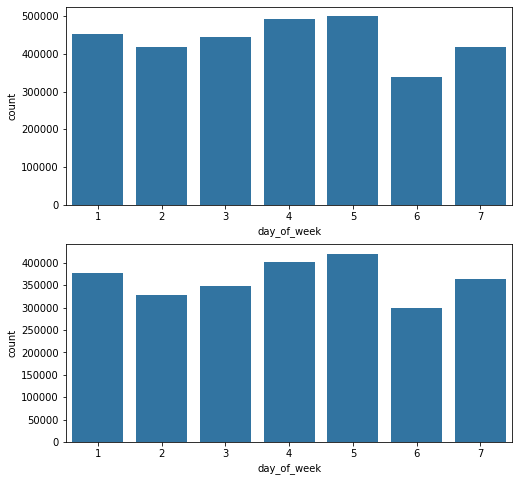

In [53]:
fig, ax = plt.subplots(nrows=2, figsize = [8,8]) 
# I want both graphs together, 1 on top of the other and I will set the size/shape as a square
default_color = sb.color_palette()[0] # only 1 color needed here
sb.countplot(data = df_2005_clean_delayed_arrival, x = 'day_of_week', color = default_color, ax = ax[0])
sb.countplot(data = df_2005_clean_delayed_departure, x = 'day_of_week', color = default_color, ax = ax[1])
plt.show()

Here, we can see that the most delays seem to happen on days 4 and 5, or Thursday and Friday. Friday has the most delays, but is closely followed by Thursday. I expected Fridays to have delays, but was not anticipating Thursday to be so close behind. I imagine this may be due to people taking long weekends, and choosing to leave on a Thursday instead of a Friday. Saturday looks to have the least delays, both for arrivals and departures, and differs by more than 100000 delays from Friday.<br><br>
Overall, there seems to be more arrival delays than departure delays, which is something interesting to note, and something I will likely discover further.

I want to create graphs for the months as well, to see how delays compare on a month to month basis.

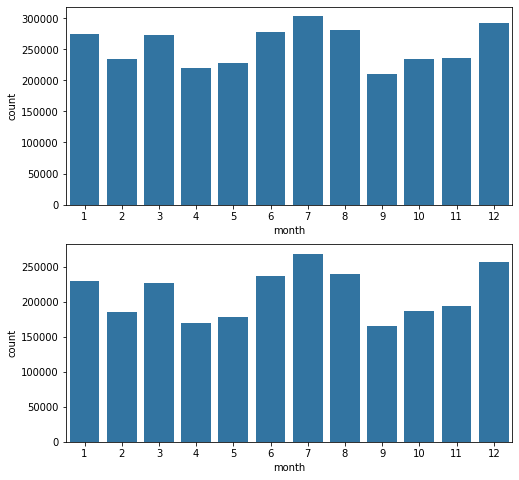

In [54]:
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = df_2005_clean_delayed_arrival, x = 'month', color = default_color, ax = ax[0])
sb.countplot(data = df_2005_clean_delayed_departure, x = 'month', color = default_color, ax = ax[1])

plt.show()

These graphs look to confirm my suspicions: there appears to be the most delays in July, then December, followed by the other summer months and then January. The lowest number of delays appears to be in September, and I could imagine this is due to it being the first month after summer, where schools are back in session, meaning fewer people are probably flying at this time (i.e. fewer delays). Again, there appears to be more arrival delays than departure delays, and I want to quickly check on these totals.

In [55]:
df_2005_clean_delayed_arrival.arrival_delay.count()

3063215

In [56]:
df_2005_clean_delayed_departure.departure_delay.count()

2537852

This confirms what I had thought: there looks to be about 500,000 fewer departure delays than arrival delays. This is interesting! I will have a quick look into the 5 given delays in the next graphs, and see how these may have differing effects on the 2 delay types.

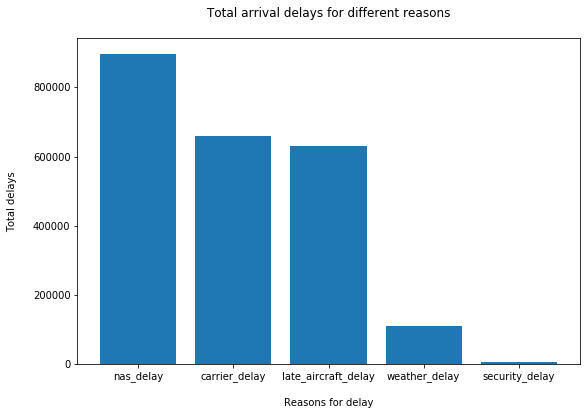

In [57]:
# first, I will find the counts for each delay reason. 
# I will filter out minutes of delay not greater than 0, as this would indicate this did not cause the flight to be delayed.

carrier_count = df_2005_clean_delayed_arrival.carrier_delay[df_2005_clean_delayed_arrival.carrier_delay>0].count()
weather_count = df_2005_clean_delayed_arrival.weather_delay[df_2005_clean_delayed_arrival.weather_delay>0].count()
nas_count = df_2005_clean_delayed_arrival.nas_delay[df_2005_clean_delayed_arrival.nas_delay>0].count()
security_count = df_2005_clean_delayed_arrival.security_delay[df_2005_clean_delayed_arrival.security_delay>0].count()
late_count = df_2005_clean_delayed_arrival.late_aircraft_delay[df_2005_clean_delayed_arrival.late_aircraft_delay>0].count()

locations = [0, 1, 2, 3, 4]
heights = sorted([carrier_count, weather_count, nas_count, security_count,late_count], reverse=True)
# using counts above as heights for bars
labels = ['nas_delay', 'carrier_delay', 'late_aircraft_delay', 'weather_delay', 'security_delay']
width = 9 # labels are long, so I will set a wide chart width.
height = 6

plt.figure(figsize=(width, height))
plt.bar(locations, heights, tick_label=labels)
plt.title("Total arrival delays for different reasons\n")
plt.xlabel("\nReasons for delay")
plt.ylabel("Total delays\n");

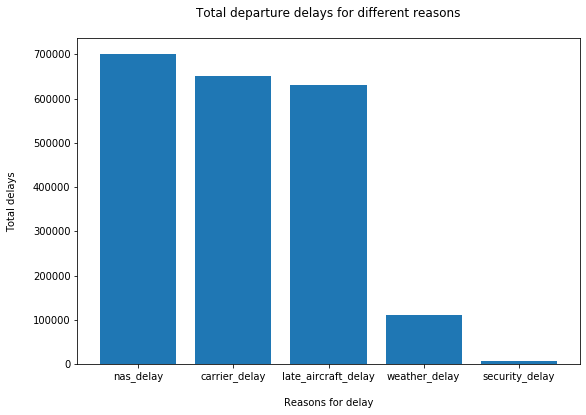

In [58]:
# mirroring the above for the df_2005_clean_delayed_departure df
dep_carrier_count = df_2005_clean_delayed_departure.carrier_delay[df_2005_clean_delayed_departure.carrier_delay>0].count()
dep_weather_count = df_2005_clean_delayed_departure.weather_delay[df_2005_clean_delayed_departure.weather_delay>0].count()
dep_nas_count = df_2005_clean_delayed_departure.nas_delay[df_2005_clean_delayed_departure.nas_delay>0].count()
dep_security_count = df_2005_clean_delayed_departure.security_delay[df_2005_clean_delayed_departure.security_delay>0].count()
dep_late_count = df_2005_clean_delayed_departure.late_aircraft_delay[df_2005_clean_delayed_departure.late_aircraft_delay>0].count()

locations = [0, 1, 2, 3, 4]
heights = sorted([dep_carrier_count, dep_weather_count, dep_nas_count, dep_security_count, dep_late_count], reverse=True)

labels = ['nas_delay', 'carrier_delay', 'late_aircraft_delay', 'weather_delay', 'security_delay']
width = 9
height = 6

plt.figure(figsize=(width, height))
plt.bar(locations, heights, tick_label=labels)
plt.title("Total departure delays for different reasons\n")
plt.xlabel("\nReasons for delay")
plt.ylabel("Total delays\n");

The reasons for delay are ranked in the same order for departure and arrival delays, but the reasons for departure delays are a bit closer together in terms of total count of delays.<br><br>NAS delays, are defined as: "Delays and cancellations attributable to the National Aviation System (NAS) that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control."<br><br>This kind of delay covers a wide range of different delays, and it makes sense then that this delay would then have the highest count of delays. NAS delays appear to delay arrivals significantly more often than departures, and I could imagine this is likely due to planes needing to be delayed in the air for reasons like unsafe landing conditions due to weather, no place for the plane to land due to traffice, and so on.

I also just want to have a quick look at actual elapsed time to generally see how long the flights in the dataset are, as I am curious to know if flights leaving the US are also included.

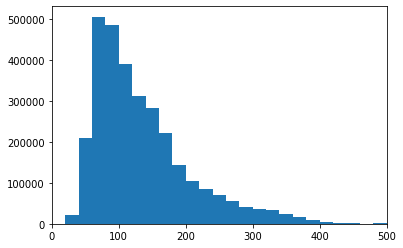

In [59]:
bins = np.arange(0, df_2005_clean_delayed_arrival['actual_elapsed_time'].max()+0.5, 20) 
plt.hist(data = df_2005_clean_delayed_arrival, x = 'actual_elapsed_time', bins = bins);
plt.xlim((0, 500));

The largest number of delays are for flights from 60-80 minutes long, and the number of delays drops of from there with the tail skewed to the right. I have set the x-lim to 500, but it seems international flights are included in this dataset as flights of 500 minutes are over 8 hours long, and I believe if you were to fly 8 hours from any US destination you would land in another country.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The majority of flights delayed in 2005 were 4-5 minutes delayed, and 75% of arrival delays/departure delays were less than 33 and 36 minutes long. There are definite outliers: 154 delays were over 1000 minutes long for example. Flights on Thursdays and Fridays, and in December and July had the most delays. The highest number of delays were attributed to NAS and carrier delays, while the least (a comparably negligable amount) were attributed to security delays.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I found that flights from 60-80 minutes long had the most delays, and from there the number of delays drops off as the flights had longer actual elapsed times.

## Bivariate Exploration

First, I want to look at the departure delays vs. arrival delays, to see if these are closely correlated: I would be surprised if these 2 delays did not have at least a fairly strong correlation. I will join the departure_and arrival delay columns from the original clean delays df, and only compare where both columns had values greater than 0, in order to only see flights that had both departure und arrival delays.

In [60]:
departure_delay_index_of_negatives = df_2005_clean_delayed[df_2005_clean_delayed.departure_delay <= 0].index
# i find the indexes of all rows in departure_delay column that are <= 0
arrival_delay_index_of_negatives = df_2005_clean_delayed[df_2005_clean_delayed.arrival_delay <= 0].index
# i find the index of all rows in arrival_delay column that are <= 0

# i transform both arrays of indexes into lists so I can use the + operator and join them together
not_delays = list(arrival_delay_index_of_negatives) + list(departure_delay_index_of_negatives)

# i use set to remove the duplicates then I transform back to list so I can drop them
delays_result = df_2005_clean_delayed.drop(list(set(not_delays)))

From what I can see it looks like all values in both columns are now positive.

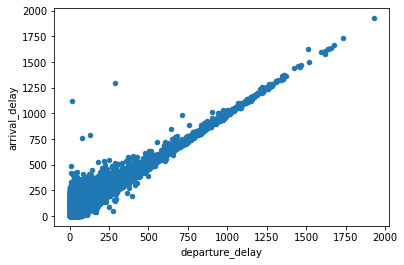

In [61]:
df_2005_clean_delayed_no_negative = delays_result.plot(x="departure_delay", y="arrival_delay", kind="scatter");

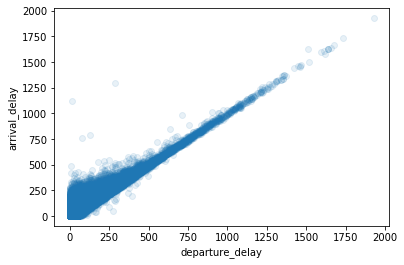

In [121]:
# I will add some jitter and transparency and look at the graph again
sb.regplot(data = delays_result, x = 'departure_delay', y = 'arrival_delay', x_jitter = 1,
            scatter_kws = {'alpha' : 1/10}, fit_reg = False);

It is clear to see in both of these graphs that departure and arrival delay have a strong, positive connection to one another, which is as expected. There is more variance in the shorter delays, whereas at the higher end of the spectrum the points are right along the fit reg line. I will have a look at correlation coeffecients a bit later on, but I am pretty confident the results will match what I see here.

Next, I want to look at diverted flights, to see if they were more delayed than non-diverted flights. I would imagine they would cause some pretty long arrival delays, as passengers would not end up at the airport they were meant to.

In [64]:
df_2005_clean_delayed.diverted.value_counts()

0    3587802
1    14028  
Name: diverted, dtype: int64

In [65]:
df_2005_clean_delayed.groupby('diverted').arrival_delay.mean().reset_index('diverted')

,diverted,arrival_delay
0,0,23.255326
1,1,NaN


In [66]:
df_2005_clean_delayed.arrival_delay[df_2005_clean_delayed.arrival_delay.isna()]

16        NaN
427       NaN
805       NaN
1786      NaN
2019      NaN
           ..
7136079   NaN
7136188   NaN
7136232   NaN
7139175   NaN
7140319   NaN
Name: arrival_delay, Length: 14028, dtype: float64

It looks like although there were about 14,000 flights in the dataset that had been diverted, none of these flights have values in the arrival delay columns, and they instead only have NaN values. I wonder why this is the case! I will have a quick look to see if this is also the case for the 1990 dataset.

In [67]:
df_1990_clean_delayed_arrival = df_1990_clean_delayed[df_1990_clean_delayed['arrival_delay'] > 0]
df_1990_clean_delayed_departure = df_1990_clean_delayed[df_1990_clean_delayed['departure_delay'] > 0]

df_1990_clean_delayed_arrival.reset_index(drop=True, inplace=True)
df_1990_clean_delayed_departure.reset_index(drop=True, inplace=True)

In [68]:
df_1990_clean_delayed.diverted.value_counts()

0    3291426
1    15954  
Name: diverted, dtype: int64

In [69]:
df_1990_clean_delayed.groupby('diverted').arrival_delay.count()

diverted
0    3291426
1    0      
Name: arrival_delay, dtype: int64

This is the same for the 1990 dataset too! I had a quick look at the BTS website to see if there was any information about this, but unfortunately the link to analysis of this variable threw an error, I will just need to move forward without analyzing the relationship of diversions with arrival delays.

I will have a quick look at the relationship between distance and arrival delay to see if there appears to be any correlation here.

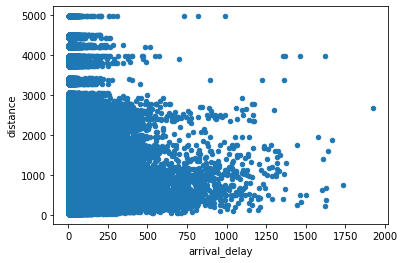

In [70]:
df_2005_clean_delayed_arrival.plot(x="arrival_delay", y="distance", kind="scatter");

It seems that the longest arrival delays take place with shorter flights, but this is a bit hard to tell with so many points on the graph. I will have a quick look at this again with a smaller sample, some jitter, and some transparency.

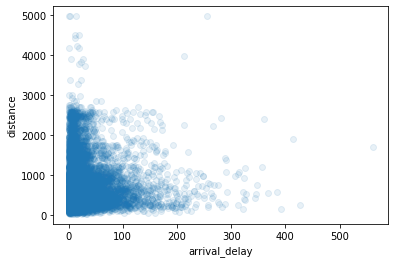

In [95]:
samp_2005_clean_delayed_arrival = df_2005_clean_delayed_arrival.sample(n=10000)
sb.regplot(data = samp_2005_clean_delayed_arrival, x = 'arrival_delay', y = 'distance', x_jitter = 1,
            scatter_kws = {'alpha' : 1/10}, fit_reg = False);

This is quite similar to the above graph of course but it is easier to pick up where the densest concentrations are, delays less than 100 minutes, and shorter than 1000 miles seem to have the most delays. I would think longer flights would tend to have longer delays, but it seems this is not really the case here.

In [97]:
np.corrcoef(samp_2005_clean_delayed_arrival.arrival_delay, samp_2005_clean_delayed_arrival.distance)

array([[1.        , 0.00409154],
       [0.00409154, 1.        ]])

We can see there is a very weak, positive linear relationship here, which was also evidenced by the line (before I had removed it).

As mentioned above, I want to have a look at the correlation coeffecients of certain variables to see how they relate to one another. I am most interested in looking at the correlations between the different cancellation reasons and arrival/departure delays.

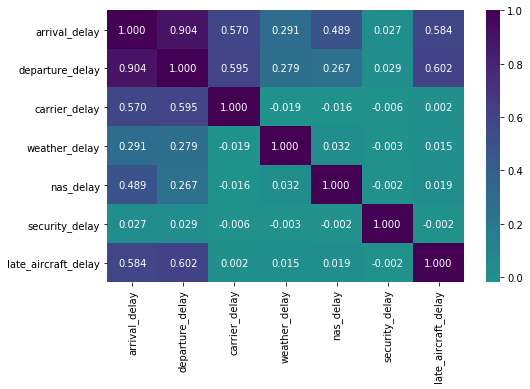

In [102]:
numeric_vars = ['arrival_delay', 'departure_delay','carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
plt.figure(figsize = [8, 5])
sb.heatmap(df_2005_clean_delayed[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis_r', center = 0)
plt.show()

We can see here, that departure and arrival delays have a very strong positive relationship of 0.904, which is to be expected after looking at the above scatterplot. The strongest positive relationships for departure delay are between late aircraft delay, and then carrier delay. These are the same 2 strongest positive relationships for arrival delay. The weakest relationships are also negative ones, between different delay reasons, such as security and carrier delay, and weather and security delays. I want to have a look to see how this map will differ, when looking at the dataset where both the departure and arrival delays have only values >0, or delays at least 1 minute long.

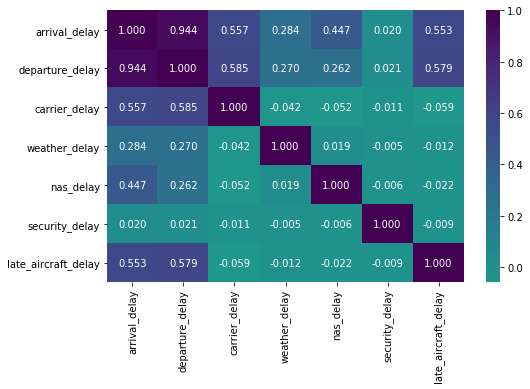

In [103]:
numeric_vars = ['arrival_delay', 'departure_delay','carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
plt.figure(figsize = [8, 5])
sb.heatmap(delays_result[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis_r', center = 0)
plt.show()

This actually seems to weaken most of the correlations. I will look at this once more with the only departure and then with the only arrival delays dfs.

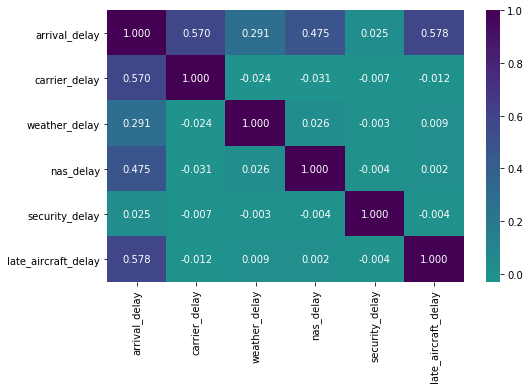

In [104]:
# same graph as above but without departure delay, and looking only at the df with arrival delays (no values <1 in this column)
numeric_vars = ['arrival_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
plt.figure(figsize = [8, 5])
sb.heatmap(df_2005_clean_delayed_arrival[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis_r', center = 0)
plt.show()

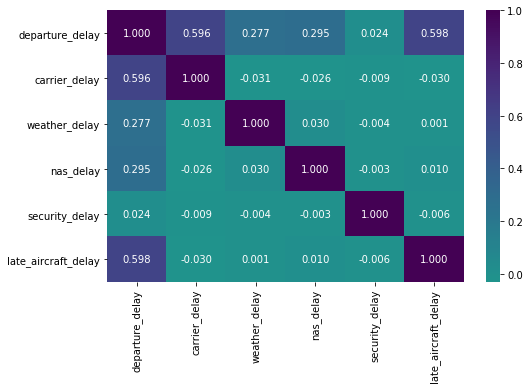

In [127]:
# same graph as above but without arrival delay, and looking only at the df with departure delays (no values <1 in this column)
numeric_vars = ['departure_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
plt.figure(figsize = [8, 5])
sb.heatmap(df_2005_clean_delayed_departure[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis_r', center = 0)
plt.show()

Both of these graphs seemed to strengthen the relationships shown in the first 2 graphs, but not substantially. The strongest positive relationships for departure delay are still between late aircraft delay, and then carrier delay, which are the same 2 strongest positive relationships for arrival delay.<br><br>It looks like these 2 factors could certainly contribute to delays, as there is a moderate, positive relationship between these variables.

I want to have a look at a pairgrid with scatterplots for the df_2005_clean_delayed dataset, to see the same information as above in the heat maps, but in scatterplot form. I will use a sample of 100,000 so that the graph does not take too long to load.

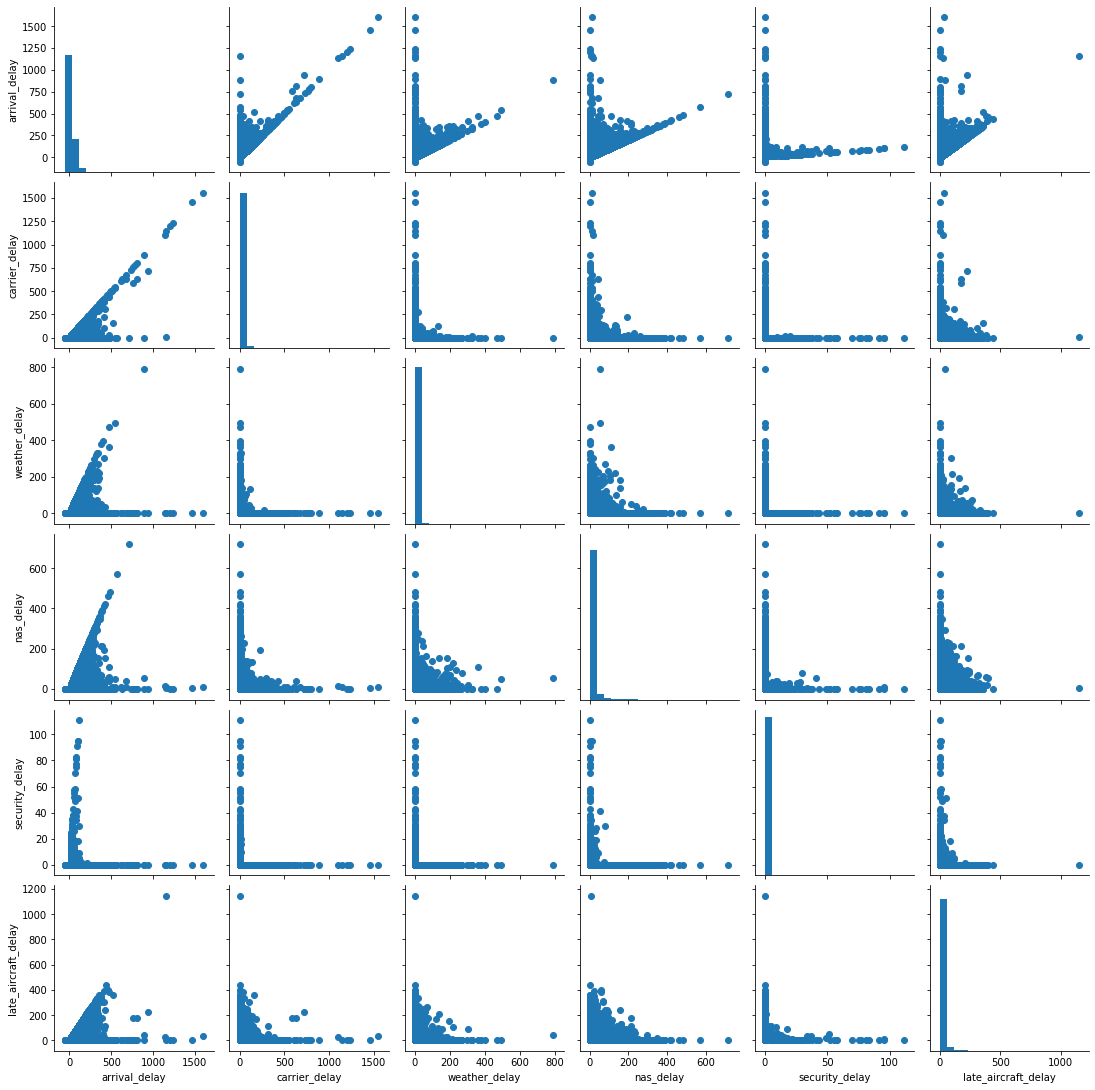

In [106]:
# df_2005_clean_delayed.reset_index(drop=True, inplace=True)
samples = np.random.choice(df_2005_clean_delayed.shape[0], 100000, replace = False)
df_2005_clean_delayed_samp = df_2005_clean_delayed.loc[samples]
g = sb.PairGrid(data = df_2005_clean_delayed_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

These plots really do not show me the information I found in the heatmaps clearly. I struggle to really see correlations with my bare eyes for these plots, while the differing colors and correlation coeffecients made assessing relationships quite easily in the heatmaps.

Earlier on, I mentioned I was interested to see which delay types have the longest delays in minutes, and I will look now at the relationships between the average amount of minutes for each delay, first for arrivals and then with departures to compare.

In [ ]:
# first I will get the sums and total count of each type of delay in order to get averages
carrier_count = df_2005_clean_delayed_arrival.carrier_delay[df_2005_clean_delayed_arrival.carrier_delay>0].count()
carrier_sum = df_2005_clean_delayed_arrival.carrier_delay[df_2005_clean_delayed_arrival.carrier_delay>0].sum()
carrier_avg_min = carrier_sum/carrier_count

weather_count = df_2005_clean_delayed_arrival.weather_delay[df_2005_clean_delayed_arrival.weather_delay>0].count()
weather_sum = df_2005_clean_delayed_arrival.weather_delay[df_2005_clean_delayed_arrival.weather_delay>0].sum()
weather_avg_min = weather_sum/weather_count

nas_count = df_2005_clean_delayed_arrival.nas_delay[df_2005_clean_delayed_arrival.nas_delay>0].count()
nas_sum = df_2005_clean_delayed_arrival.nas_delay[df_2005_clean_delayed_arrival.nas_delay>0].sum()
nas_avg_min = nas_sum/nas_count

security_count = df_2005_clean_delayed_arrival.security_delay[df_2005_clean_delayed_arrival.security_delay>0].count()
security_sum = df_2005_clean_delayed_arrival.security_delay[df_2005_clean_delayed_arrival.security_delay>0].sum()
security_avg_min = security_sum/security_count

late_count = df_2005_clean_delayed_arrival.late_aircraft_delay[df_2005_clean_delayed_arrival.late_aircraft_delay>0].count()
late_sum = df_2005_clean_delayed_arrival.late_aircraft_delay[df_2005_clean_delayed_arrival.late_aircraft_delay>0].sum()
late_avg_min = late_sum/late_count

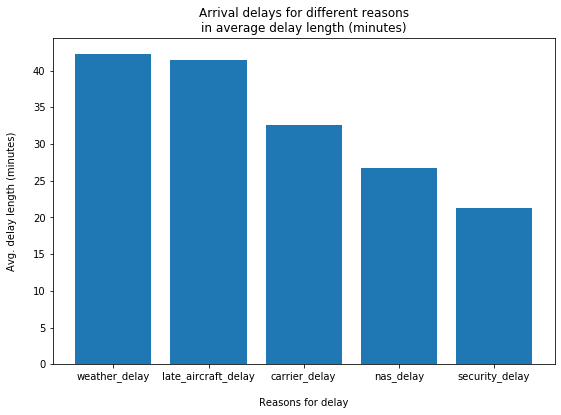

In [109]:
# then I will plot these in a bar graph to compare
locations = [0, 1, 2, 3, 4] # 5 bars in total
heights = sorted([carrier_avg_min, weather_avg_min, nas_avg_min, security_avg_min, late_avg_min], reverse=True)
# I want the bars to be sorted descending, meaning the delay with the largest average delay length first
labels = ['weather_delay', 'late_aircraft_delay', 'carrier_delay', 'nas_delay', 'security_delay']
# first I printed the sorted heights to see which order the labels should be in, then ordered the labels as such
width = 9
height = 6 # I want a nice big graph for this

plt.figure(figsize=(width, height))
plt.bar(locations, heights, tick_label=labels)
plt.title("Arrival delays for different reasons\nin average delay length (minutes)")
plt.xlabel("\nReasons for delay")
plt.ylabel("Avg. delay length (minutes)\n");

In [107]:
# here I am mirroring what I did in the above graph for arrival delays, for departure delays instead
d_carrier_count = df_2005_clean_delayed_departure.carrier_delay[df_2005_clean_delayed_departure.carrier_delay>0].count()
d_carrier_sum = df_2005_clean_delayed_departure.carrier_delay[df_2005_clean_delayed_departure.carrier_delay>0].sum()
d_carrier_avg_min = d_carrier_sum/d_carrier_count

d_weather_count = df_2005_clean_delayed_departure.weather_delay[df_2005_clean_delayed_departure.weather_delay>0].count()
d_weather_sum = df_2005_clean_delayed_departure.weather_delay[df_2005_clean_delayed_departure.weather_delay>0].sum()
d_weather_avg_min = d_weather_sum/d_weather_count

d_nas_count = df_2005_clean_delayed_departure.nas_delay[df_2005_clean_delayed_departure.nas_delay>0].count()
d_nas_sum = df_2005_clean_delayed_departure.nas_delay[df_2005_clean_delayed_departure.nas_delay>0].sum()
d_nas_avg_min = d_nas_sum/d_nas_count

d_security_count = df_2005_clean_delayed_departure.security_delay[df_2005_clean_delayed_departure.security_delay>0].count()
d_security_sum = df_2005_clean_delayed_departure.security_delay[df_2005_clean_delayed_departure.security_delay>0].sum()
d_security_avg_min = d_security_sum/d_security_count

d_late_count = df_2005_clean_delayed_departure.late_aircraft_delay[df_2005_clean_delayed_departure.late_aircraft_delay>0].count()
d_late_sum = df_2005_clean_delayed_departure.late_aircraft_delay[df_2005_clean_delayed_departure.late_aircraft_delay>0].sum()
d_late_avg_min = d_late_sum/d_late_count

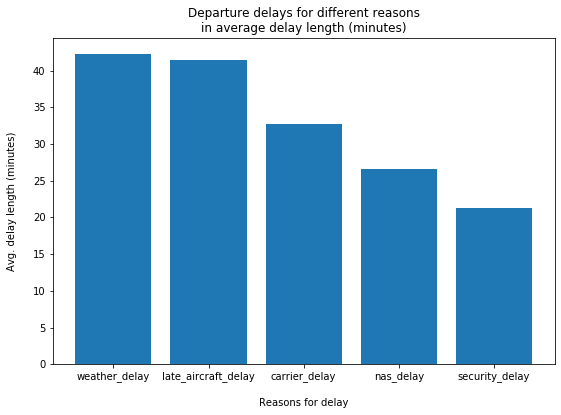

In [108]:
locations = [0, 1, 2, 3, 4]
heights = sorted([d_carrier_avg_min, d_weather_avg_min, d_nas_avg_min, d_security_avg_min, d_late_avg_min], reverse=True)

labels = ['weather_delay', 'late_aircraft_delay', 'carrier_delay', 'nas_delay', 'security_delay']
width = 9
height = 6

plt.figure(figsize=(width, height))
plt.bar(locations, heights, tick_label=labels)
plt.title("Departure delays for different reasons\nin average delay length (minutes)")
plt.xlabel("\nReasons for delay")
plt.ylabel("Avg. delay length (minutes)\n");

It is interesting to compare the average delays in minutes for each delay reason to the total number of delays as I looked at above in the univariate section, as the reasons for delay are in a different order.<br><br>NAS delay no longer has the highest value, but instead the 2nd lowest average delay length, carrier delay is in 3rd instead of 2nd place, late aircraft delay is in 2nd instead of 3rd place, and weather moves from 4th to 1st place, with the longest average delay durations both for departures and arrivals. Security delays have both the shortest average delays in minutes as well as the fewest delays.<br><br>I had made the assumption, before starting with this analysis, that weather delays would have a significant effect on delays in general, and it looks like this is true at least in terms of delay length, if not for delay count. Late aircraft delay has nearly the same delay length weather delays, and security delays are nearly half as short as weather delays.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I was unfortunately unable to investigate diversions as planned, but managed to find that the strongest relationships appear to be between late aircraft delays and carrier delays in terms of total delays, while the longest average delays appear to be related to weather and late aircraft delays. Distance does not seem to be tightly correlated with delays, and the shorter flights actually appear to have the most delays (while not having the longest).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The reasons for the delays all have very weak, even sometimes positive relationships with one another, which suggests that in most cases, there is only 1 factor attributed to a delay, and not more than 1. If there were more than one factor attributed to many delays, there would be stronger relationships between them.

## Multivariate Exploration

I first want to dive deeper into the relationship between 3 variables I looked into earlier: arrival/departure delay, day of the week, and reasons for delay. I want to see if there may be certain types of delay more often on certain days of the week than on others. I would imagine the total delays would mirror what I saw above, but I am interested in seeing how this breaks down by type of delay. I will create a multi bar chart in order to dive into this deeper.

In [110]:
delay_reasons = ['day_of_week', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
multi_bar_arr = df_2005_clean_delayed_arrival[delay_reasons]
multi_bar_dep = df_2005_clean_delayed_departure[delay_reasons] # first I select the columns I want to compare

arrival_multi_bar = pd.melt(multi_bar_arr, id_vars="day_of_week", var_name="delay_reason", value_name="arrival_delay")
departure_multi_bar = pd.melt(multi_bar_dep, id_vars="day_of_week", var_name="delay_reason", value_name="departure_delay")
# I melt the delay columns into a single column, delay reason, with the value arrival_delay in order to build the chart.

arrival_multi_bar_sample = arrival_multi_bar.sample(n=100000)
departure_multi_bar_sample = departure_multi_bar.sample(n=100000) # I will use a sample of 100,000 here

In [112]:
departure_multi_bar_sample.head()

,day_of_week,delay_reason,departure_delay
7139624,4,nas_delay,0
167938,2,carrier_delay,0
2040608,2,carrier_delay,0
1646441,2,carrier_delay,0
11865914,4,late_aircraft_delay,0


It looks like that worked, great! I want to change the days of the week to their names though instead of just the numbers, so it is more clear which days are being referred to.

In [113]:
def number_to_weekdays(df): # here I am using a function to apply the day names to the day of the week column
    week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']
    df['day_of_week'] = df['day_of_week'].apply(lambda x: week_days[x - 1]) # I use x-1 as the indexing starts with 0
    return df

arrival_multi_bar_sample = number_to_weekdays(arrival_multi_bar_sample) # I apply this to the dfs
departure_multi_bar_sample = number_to_weekdays(departure_multi_bar_sample)

In [114]:
departure_multi_bar_sample.head() # looks good!

,day_of_week,delay_reason,departure_delay
7139624,Thursday,nas_delay,0
167938,Tuesday,carrier_delay,0
2040608,Tuesday,carrier_delay,0
1646441,Tuesday,carrier_delay,0
11865914,Thursday,late_aircraft_delay,0


Now I will plot the bar graph, starting with the arrival delays. I will create one for the departure delays underneath.

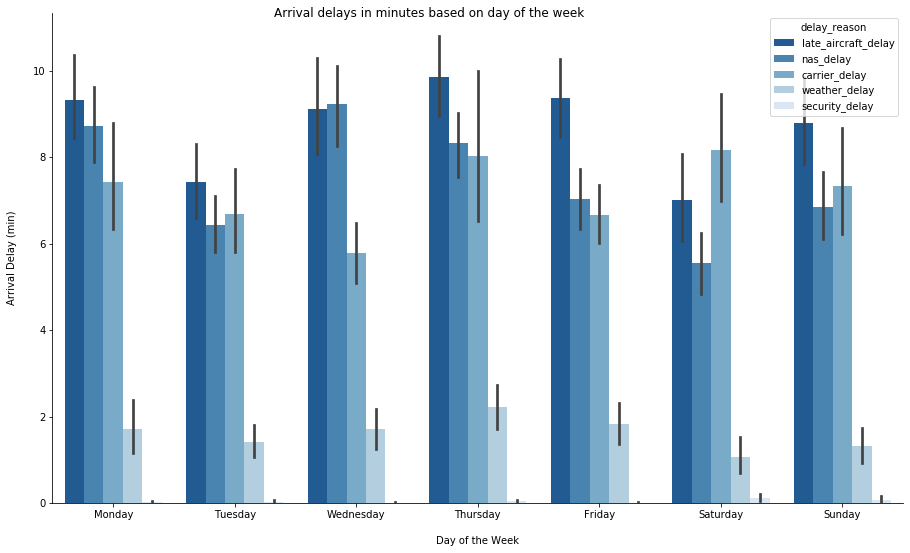

In [125]:
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']
# I want the bars to be in order from Monday-Sunday
plot = sb.catplot(x='day_of_week', y='arrival_delay', hue='delay_reason', hue_order=['late_aircraft_delay', 'nas_delay', 'carrier_delay', 'weather_delay', 'security_delay'], 
                  legend_out=False, data=arrival_multi_bar_sample, kind='bar', order=x_marker, palette = 'Blues_r')
# I want the day of the week on the x, the delay reason to be the hue, I set the hue order, indicate I want the legend
# on my graph (not separate) and use blue reversed color palette 
plot.fig.suptitle('Arrival delays in minutes based on day of the week')
plot.set_axis_labels('\nDay of the Week', 'Arrival Delay (min)\n')
plot.fig.set_figwidth(14)
plot.fig.set_figheight(8) # I want a nice large graph as I am showing lots of information

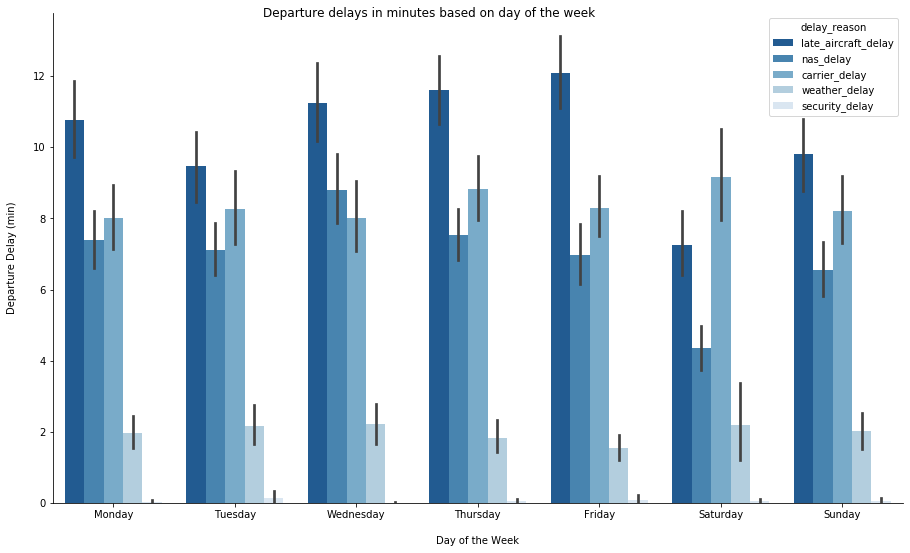

In [126]:
# I do the same as above, but for departure delays
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']
plot = sb.catplot(x='day_of_week', y='departure_delay', hue='delay_reason', hue_order=['late_aircraft_delay', 'nas_delay', 'carrier_delay', 'weather_delay', 'security_delay'], 
                  legend_out=False, data=departure_multi_bar_sample, kind='bar', order=x_marker, palette = 'Blues_r')
plot.fig.suptitle('Departure delays in minutes based on day of the week')
plot.set_axis_labels('\nDay of the Week', 'Departure Delay (min)\n')
plot.fig.set_figwidth(14)
plot.fig.set_figheight(8)

We end up with 2 graphs, showing the breakdown of arrival delays by day of the week, based on delay reason, and showing the breakdown of departure delays by day of the week, based on delay reason. Error bars are included on both graph as we are sampling from the dfs, and the graph is showing the average minutes per delay.<br><br>Late aircraft delays appear to be the most significant delay on all days except for Wednesday (arrival delays) and Saturday (arrival and departure delays). NAS delays and carrier delays then follow, with NAS delays beating out carrier delays more often for arrival delays than departure delays. When looking on a day by day basis like this, it looks like generally, delays are quite short, less than 13 minutes, at least in this current sample. It is helpful to break down these variables into smaller chunks to really zoom in on the data, as based on graphs above, it seemed that delays were frequently longer.

I am now interested to have a quick look at carriers. How does the correlation between departure/arrival delay and carrier delay compare for the top 2 carriers (in terms of delays)? As we saw in our above heatmap examples, carrier delay has a moderate, positive correlation with both arrival (0.57) and departure (0.596) delays, so this would be interesting to explore.

In [93]:
df_2005_clean_delayed.carrier.value_counts()

WN    488505
DL    351886
AA    349766
NW    266774
UA    251612
MQ    251321
OO    237008
US    231261
XE    200589
CO    165035
OH    156689
EV    150102
FL    107162
HP    106826
AS    94993 
B6    70967 
DH    61057 
F9    29310 
TZ    18931 
HA    12036 
Name: carrier, dtype: int64

I see that the top 2 carriers with delays are WN and DL, so these are the 2 I will look at.<br>WN = Southwest Airlines<br>DL = Delta Airlines<br>https://aspmhelp.faa.gov/index.php/ASQP:_Carrier_Codes_and_Names

In [129]:
# first, I create new dfs for departure and arrival delays, where carrier delays for each carrier, were >0
wn_dep_carrier = df_2005_clean_delayed_departure[df_2005_clean_delayed_departure.carrier == 'WN'][df_2005_clean_delayed_departure.carrier_delay > 0]
dl_dep_carrier = df_2005_clean_delayed_departure[df_2005_clean_delayed_departure.carrier == 'DL'][df_2005_clean_delayed_departure.carrier_delay > 0]
wn_arr_carrier = df_2005_clean_delayed_arrival[df_2005_clean_delayed_arrival.carrier == 'WN'][df_2005_clean_delayed_arrival.carrier_delay > 0]
dl_arr_carrier = df_2005_clean_delayed_arrival[df_2005_clean_delayed_arrival.carrier == 'DL'][df_2005_clean_delayed_arrival.carrier_delay > 0]

<ipython-input-129-f02bb93141ce>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wn_dep_carrier = df_2005_clean_delayed_departure[df_2005_clean_delayed_departure.carrier == 'WN'][df_2005_clean_delayed_departure.carrier_delay > 0]
<ipython-input-129-f02bb93141ce>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dl_dep_carrier = df_2005_clean_delayed_departure[df_2005_clean_delayed_departure.carrier == 'DL'][df_2005_clean_delayed_departure.carrier_delay > 0]
<ipython-input-129-f02bb93141ce>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wn_arr_carrier = df_2005_clean_delayed_arrival[df_2005_clean_delayed_arrival.carrier == 'WN'][df_2005_clean_delayed_arrival.carrier_delay > 0]
<ipython-input-129-f02bb93141ce>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dl_arr_carrier = df_2005_clean_delayed_arrival[df_2005_clean_delayed_arrival.carrier == 'DL'][df_2005_c

Now I will plot each of these graphs, and take a look at the correlation coeffecients to compare.

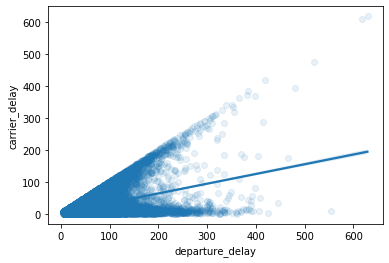

In [133]:
# departure delays vs. carrier delays for Southwest Airlines
sb.regplot(data = wn_dep_carrier, x = 'departure_delay', y = 'carrier_delay',
           x_jitter = 1, y_jitter = 1, scatter_kws = {'alpha' : 1/10});

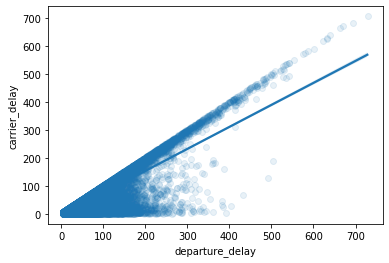

In [134]:
# departure delays vs. carrier delays for Delta Airlines
sb.regplot(data = dl_dep_carrier, x = 'departure_delay', y = 'carrier_delay',
           x_jitter = 1, y_jitter = 1, scatter_kws = {'alpha' : 1/10});

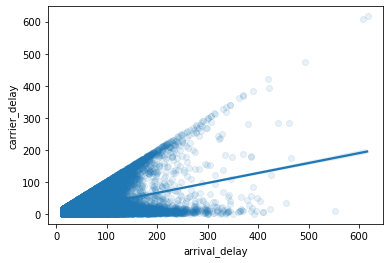

In [135]:
# arrival delays vs. carrier delays for Southwest Airlines
sb.regplot(data = wn_arr_carrier, x = 'arrival_delay', y = 'carrier_delay',
           x_jitter = 1, y_jitter = 1, scatter_kws = {'alpha' : 1/10});

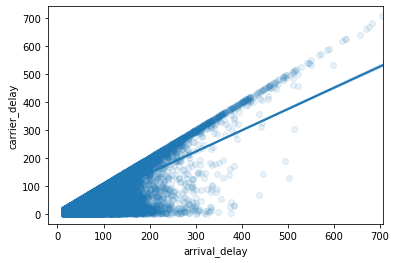

In [136]:
# arrival delays vs. carrier delays for Delta Airlines
sb.regplot(data = dl_arr_carrier, x = 'arrival_delay', y = 'carrier_delay',
           x_jitter = 1, y_jitter = 1, scatter_kws = {'alpha' : 1/10});

From what I can see in the scatterplots, it looks like Delta had the higher correlation between carrier delays and both arrival and departure delays, but I will check the correlation coeffecients quickly to check this.

In [141]:
wn_dep_corr = np.corrcoef(wn_dep_carrier.departure_delay, wn_dep_carrier.carrier_delay)
dl_dep_corr = np.corrcoef(dl_dep_carrier.departure_delay, dl_dep_carrier.carrier_delay)
wn_arr_corr = np.corrcoef(wn_arr_carrier.arrival_delay, wn_arr_carrier.carrier_delay)
dl_arr_corr = np.corrcoef(dl_arr_carrier.arrival_delay, dl_arr_carrier.carrier_delay)
print(wn_dep_corr, dl_dep_corr, wn_arr_corr, dl_arr_corr)

[[1.         0.46733253]
 [0.46733253 1.        ]] [[1.         0.86409024]
 [0.86409024 1.        ]] [[1.         0.46834089]
 [0.46834089 1.        ]] [[1.         0.83741125]
 [0.83741125 1.        ]]


Here we can see that the correlation between carrier delays and arrival (0.84) and departure (0.86) delays is much stronger for Delta Airlines than for Southwest (arrival and departure: 0.47). It looks like the reason for delay is much more likely to be due to the carrier for Delta Airlines than for Southwest airlines. It would be interesting to further explore this, in order to get to the root of the cause for so many carrier delays for Delta. What are they doing differently than Southwest?

Next, I want to finish up my analysis by looking at a line plot of 2005 and 1990 delays, in order to see how these differ with 15 years in between.

In [144]:
# I will take samples first from both datasets.
df_sample_1990_arr = df_1990_clean_delayed_arrival.sample(n=10000)
df_sample_2005_arr = df_2005_clean_delayed_arrival.sample(n=10000)
df_sample_1990_dep = df_1990_clean_delayed_departure.sample(n=10000)
df_sample_2005_dep = df_2005_clean_delayed_departure.sample(n=10000)

In [145]:
# I create separate dfs for arrivals/departures for total delayed minutes for 1990 and 2005 dfs
df_1990_plot_arr = df_sample_1990_arr.groupby(['month']).arrival_delay.sum().reset_index('month')
df_2005_plot_arr = df_sample_2005_arr.groupby(['month']).arrival_delay.sum().reset_index('month')
df_1990_plot_dep = df_sample_1990_dep.groupby(['month']).departure_delay.sum().reset_index('month')
df_2005_plot_dep = df_sample_2005_dep.groupby(['month']).departure_delay.sum().reset_index('month')

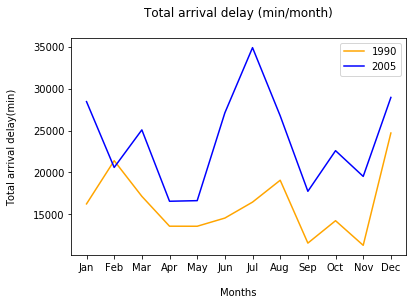

In [147]:
months_str = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# I want the month names and not the numbers
plt.plot(months_str, df_1990_plot_arr['arrival_delay'], color='orange') # differentiating lines with color
plt.plot(months_str, df_2005_plot_arr['arrival_delay'], color='blue')
plt.xlabel('\nMonths')
plt.ylabel('Total arrival delay(min)\n')
plt.title('Total arrival delay (min/month)\n')
plt.legend(['1990', '2005'])
plt.show()

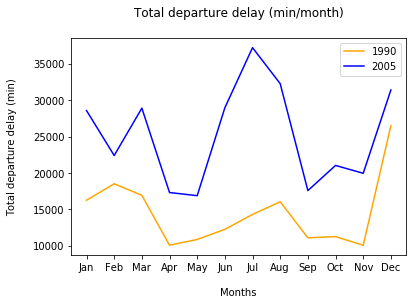

In [148]:
plt.plot(months_str, df_1990_plot_dep['departure_delay'], color='orange') # differentiating lines with color
plt.plot(months_str, df_2005_plot_dep['departure_delay'], color='blue')
plt.xlabel('\nMonths')
plt.ylabel('Total departure delay (min)\n')
plt.title('Total departure delay (min/month)\n')
plt.legend(['1990', '2005'])
plt.show()

We can see in these graphs, that 2005 had more delayed minutes than 1990 in all months except for February arrival delays, where 1990 surpassed 2005 very slightly. The general shape of the lines for both years in both graphs are pretty similar, with similar peaks and valleys, except for January-March for both arrival and departure delays. It is interesting to see the differences here: what was at the root of the cause for these? I imagine that the higher number of delays in 2005 versus 1990 are due to a higher number of flights which would in turn likely lead to a higher number of delays, especially in the summer months, where the peak length of departure delay takes place in July.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I found that late aircraft delays appear to be attributed to the longest delay lengths on a daily basis, that the major delay reason for Delta Airlines flights is due to the carrier, and that 2005 had overall many more minutes of delay than 1990. Late aircraft delay appears to be a strong contender for flight delays, both in terms of departures, and arrivals (at least for the 2005 data), and in the multibar graph, again it showed that both the number of delays as well as length of delays were highest on Thursdays and Fridays.

### Were there any interesting or surprising interactions between features?

> It was interesting to see the significant difference in correlation coeffecients for the top 2 airlines with the most delays. Although Southwest had the most delays, it seems a much higher proportion of these were caused by other delay factors besides carrier delays, whereas a large proportion of the Delta delays were due to the carrier. I also found it interesting that the months with longest delays were generally the same between 1990 and 2005, and I imagine this would likely be the same today too. 